In [1]:
#Upload do dataset processado para o drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

# Importação das bibliotecas

In [ ]:

pip install "statsmodels==0.13.2"

In [ ]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#Leitura do dataset RU
data = pd.read_csv("/content/drive/MyDrive/topicos/data_ru.csv", sep = ';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1095 non-null   object
 1   lunch   1095 non-null   int64 
 2   dinner  1095 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 25.8+ KB


In [ ]:
data.head()

,date,lunch,dinner
0,2016-01-04,364,294
1,2016-01-05,489,363
2,2016-01-06,522,401
3,2016-01-07,514,349
4,2016-01-08,409,218


In [ ]:
#Converter o campo date para formato datetime, permitindo a manipulação
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1095 non-null   datetime64[ns]
 1   lunch   1095 non-null   int64         
 2   dinner  1095 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 25.8 KB


In [ ]:
#definir o campo date como índice do dataframe
data.set_index('date', inplace=True)

In [ ]:
#Criando um novo dataframe, com frequencia diária e com os valores vazios preenchidos com 0
dataMod = data.asfreq('d')
dataMod = dataMod.fillna(0)# Preencher os valores NA com 0s

In [ ]:
#Testar se há valores vazios
dataMod.isnull().values.any()

False

In [ ]:
#Dividindo o dataset alterado em conjuntos de treino e teste
lunch_train = dataMod[dataMod.index.year<2019]["lunch"]
lunch_test = dataMod[dataMod.index.year==2019]["lunch"]
dinner_train = dataMod[dataMod.index.year<2019]["dinner"]
dinner_test = dataMod[dataMod.index.year==2019]["dinner"]

In [ ]:
#treinamento e predição para o almoço
model = AutoReg(lunch_train, lags=365)
model_fit = model.fit()
lunch_pred = model_fit.predict(len(lunch_train),len(lunch_test)+len(lunch_train)-1,dynamic=False)
lunch_pred[lunch_pred<0] = 0

In [ ]:
#Avaliação do modelo através do método r2 score
r2_score(lunch_test,lunch_pred)

0.726032691037806

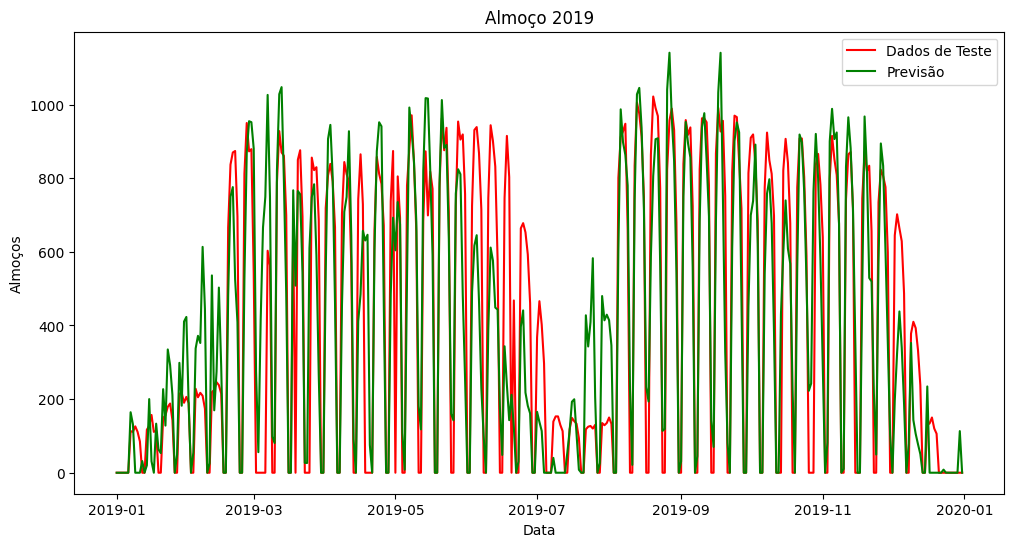

In [ ]:
# Definir o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Configurar o título, rótulos dos eixos e plotar os dados de teste e previsão
plt.title("Almoço 2019")
plt.xlabel("Data")
plt.ylabel("Almoços")
plt.plot(lunch_test.index, lunch_test, color = "red", label="Dados de Teste")
plt.plot(lunch_test.index, lunch_pred, color='green', label="Previsão")
plt.legend()

# Mostrar o gráfico
plt.show()


In [ ]:
#treinamento e predição para a janta
model = AutoReg(dinner_train, lags=365)
model_fit = model.fit()
#Fazer predição
dinner_pred = model_fit.predict(len(dinner_train),len(dinner_test)+len(dinner_train)-1,dynamic=False)
dinner_pred[dinner_pred<0] = 0

In [ ]:
#Avaliação do modelo através do método r2 score
r2_score(dinner_test,dinner_pred)

0.7264856877990088

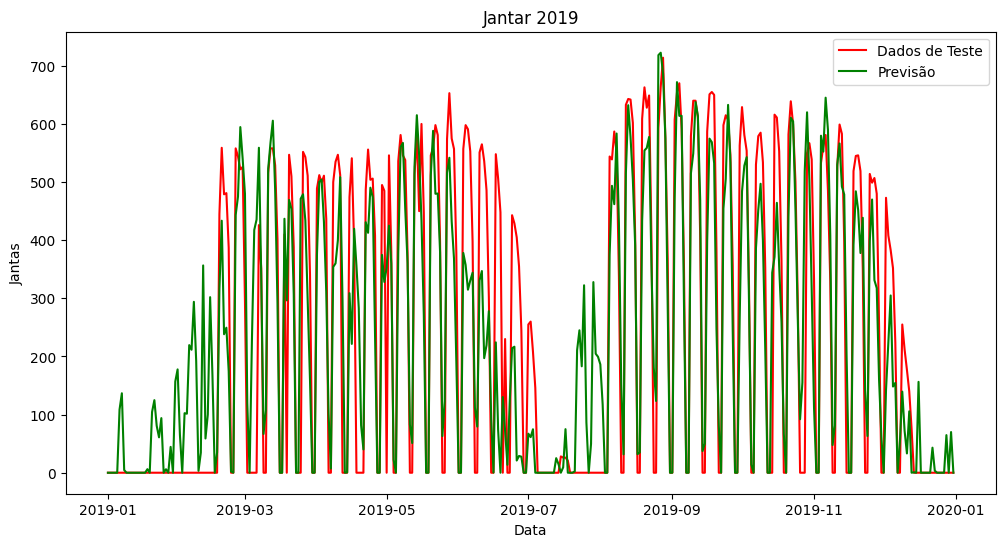

In [ ]:
# Definir o tamanho do gráfico
plt.figure(figsize=(12, 6))

# Configurar o título, rótulos dos eixos e plotar os dados de teste e previsão
plt.title("Jantar 2019")
plt.xlabel("Data")
plt.ylabel("Jantas")
plt.plot(lunch_test.index, dinner_test, color = "red", label="Dados de Teste")
plt.plot(lunch_test.index, dinner_pred, color='green', label="Previsão")
plt.legend()

# Mostrar o gráfico
plt.show()
